# CP3403 Data Mining
## Report: Credit Card Fraud

### Group: Matthew Marsh, Dannielle Jones and Callum Gracie

This data mining explores: If there is a relationship between the geographical location of the merchant to where credit card fraud occurs?

# Import Packages and Get Data

In [24]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
#from datetime import datetime, date
from sklearn.cluster import DBSCAN

In [25]:
data = pd.read_csv('data/fraudTrain.csv')  # Read
#pd.set_option('display.float_format', lambda x:'%f'%x)  # Format

In [26]:
#print('Number of Records: {}'.format(len(data)))
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
data.head()

Dataset rows: 1296675 columns: 23


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Pre-Processing: NaN Data and Missing Data

In [27]:
# Check dataset for missing or NaN values
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
missing_values_count = data.isna().sum()
print(missing_values_count)

Dataset rows: 1296675 columns: 23
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


# Pre-Processing: Convert and Format Data

In [28]:
# View the unnamed column, then get and rename
print(data.iloc[:,0])
data = data.rename(columns={data.columns[0]: "column_id"})
data.set_index('column_id', inplace=True)
data.head()

0                0
1                1
2                2
3                3
4                4
            ...   
1296670    1296670
1296671    1296671
1296672    1296672
1296673    1296673
1296674    1296674
Name: Unnamed: 0, Length: 1296675, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [29]:
# Convert to numeric
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')
data['zip'] = pd.to_numeric(data['zip'], errors='coerce')
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data['city_pop'] = pd.to_numeric(data['city_pop'], errors='coerce')
data['merch_lat'] = pd.to_numeric(data['merch_long'], errors='coerce')
data['is_fraud'] = pd.to_numeric(data['is_fraud'], errors='coerce')

In [30]:
# Processing date of birth
data['dob'] = pd.to_datetime(data['dob'])  # convert to datetime object
data['year_of_birth'] = data['dob'].dt.year  # extract year
data['month_of_birth'] = data['dob'].dt.month  # extract month
data['day_of_birth'] = data['dob'].dt.day  # extract day
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,-82.048315,-82.048315,0,1988,3,9
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,-118.186462,-118.186462,0,1978,6,21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,-112.154481,-112.154481,0,1962,1,19
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,-112.561071,-112.561071,0,1967,1,12
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,-78.632459,-78.632459,0,1986,3,28


In [31]:
# Processing transaction date and time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # convert to datetime object
data['year_of_trans'] = data['trans_date_trans_time'].dt.year  # extract year
data['month_of_trans'] = data['trans_date_trans_time'].dt.month  # extract month
data['day_of_trans'] = data['trans_date_trans_time'].dt.day  # extract day
data['time_of_trans'] = data['trans_date_trans_time'].dt.time  # extract time
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,-82.048315,0,1988,3,9,2019,1,1,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,-118.186462,0,1978,6,21,2019,1,1,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,-112.154481,0,1962,1,19,2019,1,1,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,-112.561071,0,1967,1,12,2019,1,1,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,-78.632459,0,1986,3,28,2019,1,1,00:03:06


In [32]:
# Processing Gender into binary
gender_count = data['gender'].value_counts()
data['is_female'] = data['gender'].apply(lambda x: 1 if x.upper() == "F" else 0)
is_female_count = data['is_female'].value_counts()
print("Gender Count: \n{}".format(gender_count))
print("is_female Count: \n{}".format(is_female_count))
data.head()

Gender Count: 
F    709863
M    586812
Name: gender, dtype: int64
is_female Count: 
1    709863
0    586812
Name: is_female, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans,is_female
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,1988,3,9,2019,1,1,00:00:18,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,1978,6,21,2019,1,1,00:00:44,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,1962,1,19,2019,1,1,00:00:51,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,1967,1,12,2019,1,1,00:01:16,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,1986,3,28,2019,1,1,00:03:06,0


# Pre-Processing: Create Data Sub-Set

In [33]:
# Create a sub-set of merchant longitude and latitude
sub1 = data[['merch_lat', 'merch_long', 'is_fraud']]
print('Subset rows: {} columns: {}'.format(sub1.shape[0], sub1.shape[1]))
sub1.head()

Subset rows: 1296675 columns: 3


,merch_lat,merch_long,is_fraud
column_id,,,
0,-82.048315,-82.048315,0
1,-118.186462,-118.186462,0
2,-112.154481,-112.154481,0
3,-112.561071,-112.561071,0
4,-78.632459,-78.632459,0


In [34]:
# Check how many cases are fraud
is_fraud_count = sub1[(sub1['is_fraud'] == 1)]
print('Fraud count: {}'.format(len(is_fraud_count)))
is_fraud_count.head()

Fraud count: 7506


,merch_lat,merch_long,is_fraud
column_id,,,
2449,-81.179483,-81.179483,1
2472,-99.142791,-99.142791,1
2523,-98.836360,-98.836360,1
2546,-82.091010,-82.091010,1
2553,-98.683410,-98.683410,1


In [35]:
sub2 = sub1.copy()

# Data Mining Technique/Method:
## Visualisation: Pre-Processing

In [36]:
# Current data subset
sub2.head()

,merch_lat,merch_long,is_fraud
column_id,,,
0,-82.048315,-82.048315,0
1,-118.186462,-118.186462,0
2,-112.154481,-112.154481,0
3,-112.561071,-112.561071,0
4,-78.632459,-78.632459,0


In [37]:
# Get only longitude and latitude
sub2 = data[['merch_lat', 'merch_long']]
sub2.head()

,merch_lat,merch_long
column_id,,
0,-82.048315,-82.048315
1,-118.186462,-118.186462
2,-112.154481,-112.154481
3,-112.561071,-112.561071
4,-78.632459,-78.632459


In [38]:
sub3 = sub2.copy()

## Visualisation: Plots/Graphs

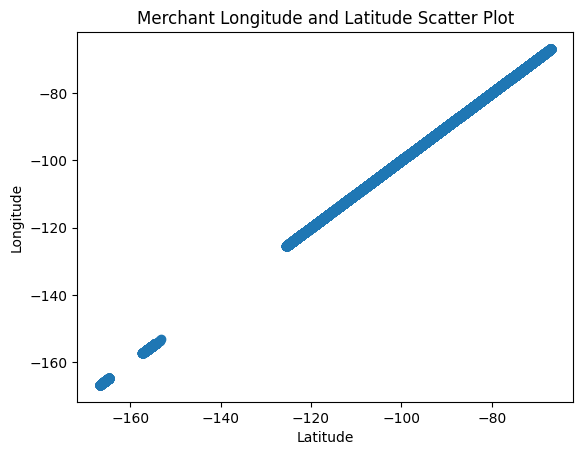

In [39]:
# Visualise spatial data using scatter plot
%matplotlib inline

plt.title("Merchant Longitude and Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(sub3['merch_lat'], sub3['merch_long'])
plt.show()

### Conclusions:
Overall, there appears to be three clusters and a general linear relationship. The sample size it too large to determine any specific dot patterns.

In [40]:
# Get random sub-sample
np.random.seed(42)

sub_fraction = 0.2
random_fraction_sub = sub3.sample(frac=sub_fraction, random_state=42)

sub_size = 300
random_size_sub = sub3.sample(n=sub_size, random_state=42)

print(f"Current size of data: {len(sub3)} \n")
print(f"Random fraction sub-sample: \n{random_size_sub} Records Count: {len(random_fraction_sub)} \n")
print(f"Random size sub-sample: \n{random_size_sub} Records Count: {len(random_size_sub)}")

Current size of data: 1296675 

Random fraction sub-sample: 
            merch_lat  merch_long
column_id                        
1045211    -78.865012  -78.865012
547406    -123.636337 -123.636337
110142     -78.898190  -78.898190
1285953    -76.542384  -76.542384
271705    -104.092324 -104.092324
...               ...         ...
467236     -77.422867  -77.422867
595862     -74.599868  -74.599868
250653    -112.515811 -112.515811
1163108    -73.272865  -73.272865
988827     -89.891696  -89.891696

[300 rows x 2 columns] Records Count: 259335 

Random size sub-sample: 
            merch_lat  merch_long
column_id                        
1045211    -78.865012  -78.865012
547406    -123.636337 -123.636337
110142     -78.898190  -78.898190
1285953    -76.542384  -76.542384
271705    -104.092324 -104.092324
...               ...         ...
467236     -77.422867  -77.422867
595862     -74.599868  -74.599868
250653    -112.515811 -112.515811
1163108    -73.272865  -73.272865
988827     -89.8

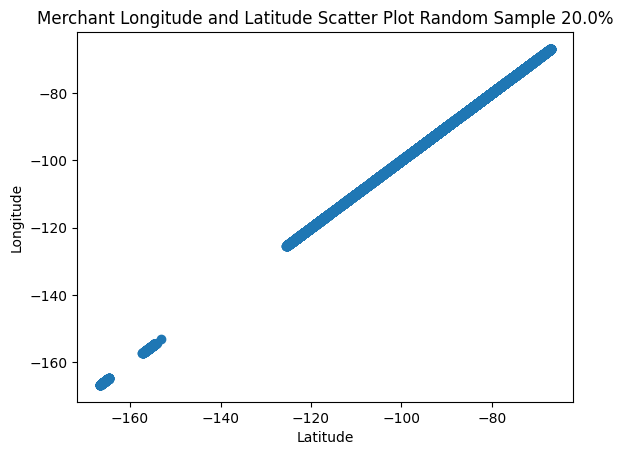

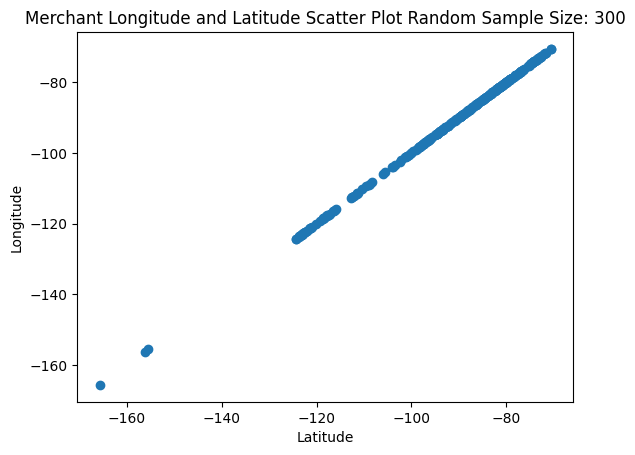

In [41]:
# Visualise random sub-sample spatial data using scatter plot
plt.title(f"Merchant Longitude and Latitude Scatter Plot Random Sample {sub_fraction * 100}%")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(random_fraction_sub['merch_lat'], random_fraction_sub['merch_long'])
plt.show()

# Visualise spatial data using scatter plot
plt.title(f"Merchant Longitude and Latitude Scatter Plot Random Sample Size: {sub_size}")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(random_size_sub['merch_lat'], random_size_sub['merch_long'])
plt.show()

### DBScan clustering algorithm

In [42]:
# DBSCAN Clustering with standard sub-sample
neighbourhood_radius_1 = 15.5
min_num_of_points_1 = 5

dbscan_data_1 = DBSCAN(eps=neighbourhood_radius_1, min_samples=min_num_of_points_1).fit(sub3)
core_samples_mask_1 = np.zeros_like(dbscan_data_1.labels_, dtype=bool)
core_samples_mask_1[dbscan_data_1.core_sample_indices_] = True
labels_1 = pd.DataFrame(dbscan_data_1.labels_, columns=['Cluster ID'])
result_1 = pd.concat((sub3, labels_1), axis=1)

plt.title("Merchant Longitude and Latitude DBSCAN Clustering Result (Full sample)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
result_1.plot.scatter('merch_lat', 'merch_long', c='Cluster ID', colormap='jet')

In [ ]:
# DBSCAN Clustering with random size sub-sample
neighbourhood_radius_2 = 15.5
min_num_of_points_2 = 5

dbscan_data_2 = DBSCAN(eps=neighbourhood_radius_2, min_samples=min_num_of_points_2).fit(random_size_sub)
core_samples_mask_2 = np.zeros_like(dbscan_data_2.labels_, dtype=bool)
core_samples_mask_2[dbscan_data_2.core_sample_indices_] = True
labels_2 = pd.DataFrame(dbscan_data_2.labels_, columns=['Cluster ID'])
result_2 = pd.concat((random_size_sub, labels_2), axis=1)

plt.title("Merchant Longitude and Latitude DBSCAN Clustering Result (Random Sample Size)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
result_2.plot.scatter('merch_lat', 'merch_long', c='Cluster ID', colormap='jet')

### Conclusions:


## Visualisation: Results and Data